In [1]:
import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

from nn_interpretability.model.model_repository import ModelRepository
from nn_interpretability.visualization.rgb_visualizer import RGBVisualizer

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = torchvision.models.vgg16(pretrained=True).to(device)
model.eval()

img_path = './data/bike.jpg'

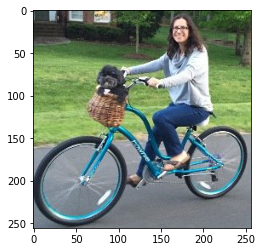

In [3]:
image = RGBVisualizer.read_img(img_path)
image = RGBVisualizer.preprocess(image)
image = image.to(device)
logits = model(image).to(device)
_, idx = torch.max(logits, dim=1)

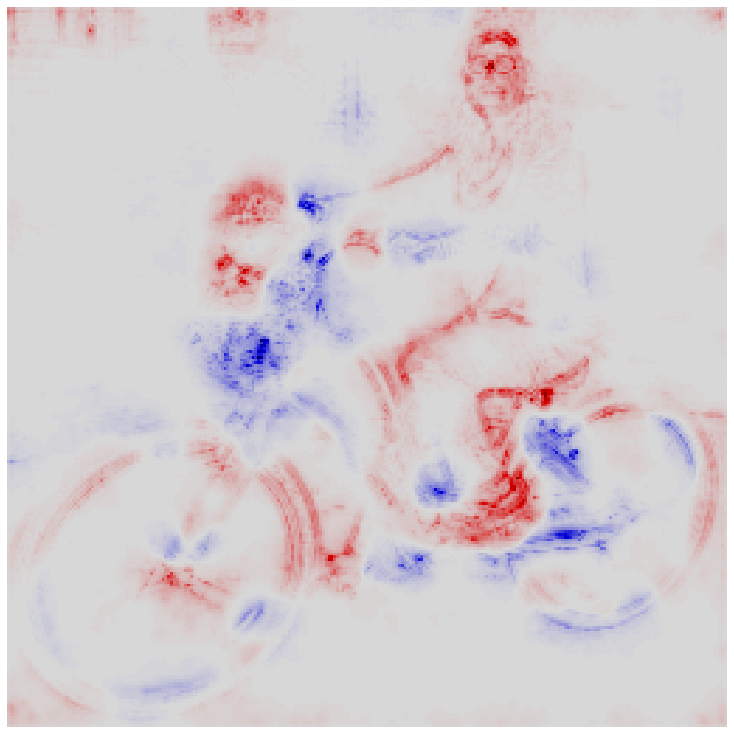

In [4]:
from nn_interpretability.interpretation.lrp.lrp_composite import LRPMix

img_shape = (image.size(2), image.size(3))
interpretor = LRPMix(model, 'predicted', None, 1, 0, 0)
endpoint = interpretor.interpret(image)
RGBVisualizer.heatmap(endpoint[0].detach().cpu().numpy().sum(axis=0), 10, 10)

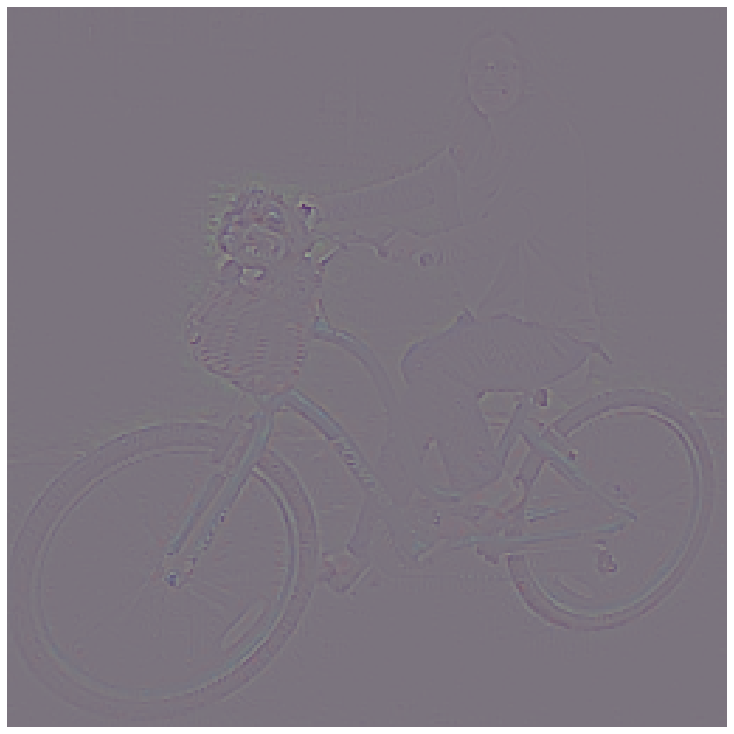

In [5]:
from nn_interpretability.interpretation.backprop.guided_backprop import GuidedBackprop

img_shape = (image.size(2), image.size(3))
interpretor = GuidedBackprop(model, [], None)
endpoint = interpretor.interpret(image)
RGBVisualizer.show(endpoint, 10, 10)

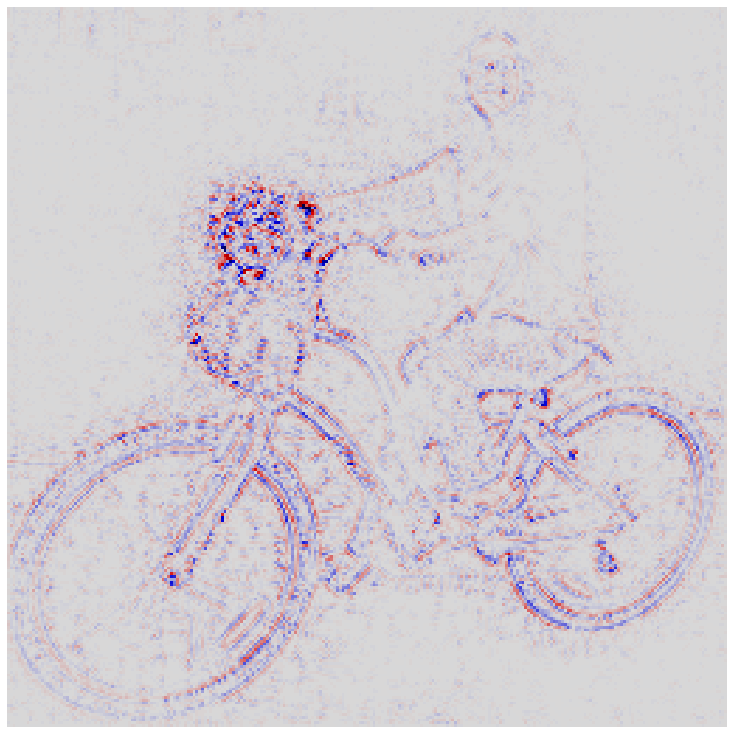

In [6]:
from nn_interpretability.interpretation.deeplift.deeplift import DeepLIFT, DeepLIFTRules

img_shape = (image.size(2), image.size(3))
interpretor = DeepLIFT(model, [], None, DeepLIFTRules.RevealCancel)
endpoint = interpretor.interpret(image)
RGBVisualizer.heatmap(endpoint[0].cpu().numpy().sum(axis=0), 10, 10)